# <span style="color:orange">Modeling</span>

,Predicted False,Predicted True
Actual False,984,68
Actual True,127,228


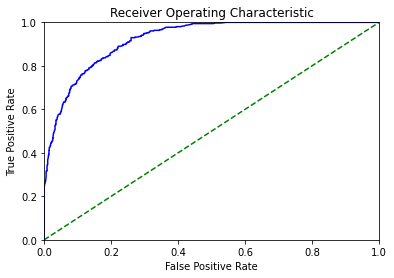

In [214]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(y_test, predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We can also plot feature importance to gain some insight as to what features were most useful in our model, which will be of great help when refining our model in the future.

3.0528740007613244


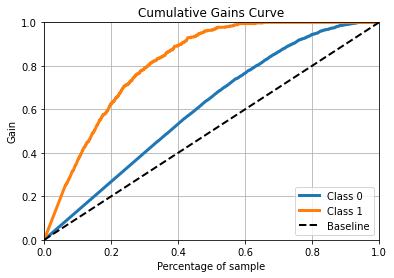

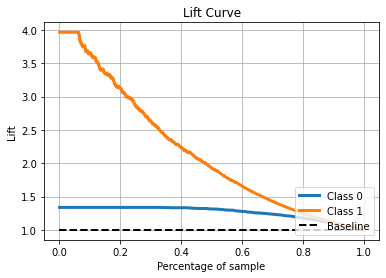

In [215]:
print(lift_score(y_test, predictions))
import matplotlib.pyplot as plt
import scikitplot as skplt

#Y_test_pred_ = model.predict_proba(X_test_df)[:]

probs=clf.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(y_test, probs)
plt.show()

skplt.metrics.plot_lift_curve(y_test, probs)
plt.show()
# CLASS?`
# HOW TO EXTRACT THE TOP QUARTILE?
# skplt.estimators.plot_feature_importances(clf, feature_names=df_test.columns,..........
# QCUT, Encoding.Normalize

# <span style="color:red">Lift score</span>

In [216]:
#df_test['probs']=probs[1]
p1=pd.DataFrame(data=probs)
p1[1]
X_test.reset_index(drop=True, inplace=True)
X_test
X_test['p1']=p1[1]
X_test['q']=pd.qcut(df_test['p1'], q=5)
X_test

C:\Users\emreo\miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\emreo\miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Compound,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,p1,q
0,0.0,0.295775,0.701493,0.215365,0.494959,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.548806,"(0.475, 0.819]"
1,0.0,0.436620,0.463682,0.229881,0.335193,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.120292,"(0.121, 0.263]"
2,0.0,0.197183,0.279104,0.071619,0.418735,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.391222,"(0.263, 0.475]"
3,0.0,0.084507,0.775622,0.071648,0.606877,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.650860,"(0.475, 0.819]"
4,0.0,0.676056,0.819900,0.565307,0.317742,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.136640,"(0.0555, 0.121]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0.0,0.042254,0.662189,0.040745,0.117113,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.929962,"(0.475, 0.819]"
1403,1.0,0.309859,0.568657,0.187486,0.845000,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.033443,"(0.263, 0.475]"
1404,0.0,0.408451,0.667662,0.289822,0.001566,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.944294,"(0.0555, 0.121]"
1405,1.0,0.760563,0.701990,0.552331,0.789392,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.037572,"(0.0555, 0.121]"


,importance,labels
0,0.0,SeniorCitizen
43,0.0,PaymentMethod_Credit card (automatic)
42,0.0,PaymentMethod_Bank transfer (automatic)
35,0.0,StreamingMovies_No internet service
34,0.0,StreamingMovies_No


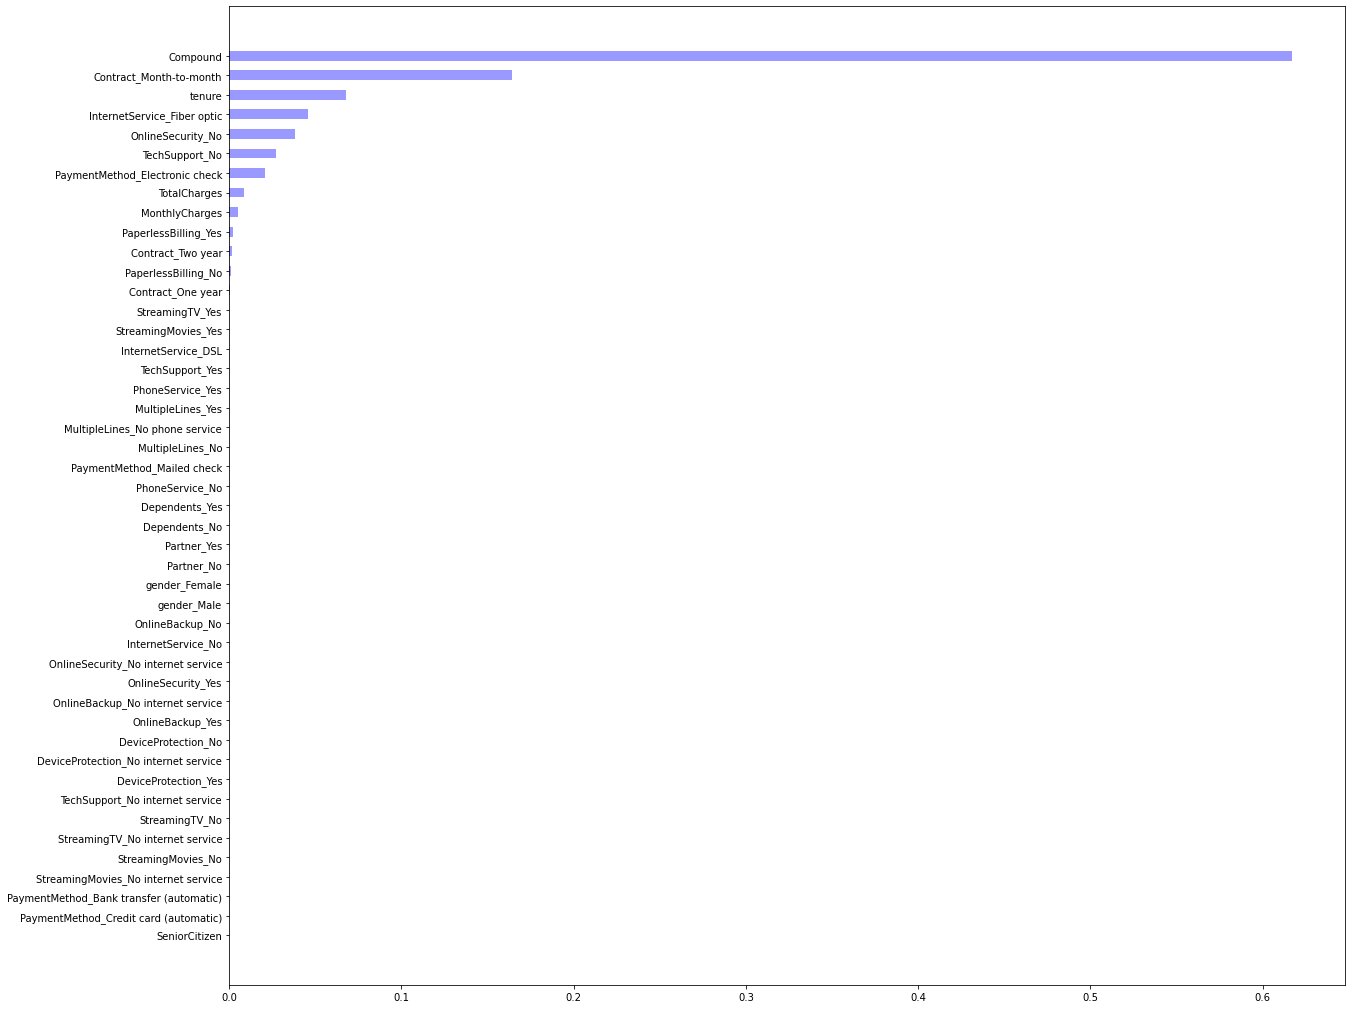

In [217]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

X_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
X_f["labels"] = features
X_f.sort_values("importance", inplace=True, ascending=True)
display(X_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , X_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, X_f["labels"])
plt.show()

# Results



The output of this exercise is a corresponding score (representing churn propensity) for each client, as can been seen below. For insight into how these scores could be leveraged by your business, keep reading the next section.

In [170]:
X_test["prob_true"] = probs[:, 1]
X_test

C:\Users\emreo\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,p1,q,prob_true
0,0.0,0.295775,0.701493,0.215365,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.557795,"(0.475, 0.819]",0.557795
1,0.0,0.436620,0.463682,0.229881,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.139555,"(0.121, 0.263]",0.139555
2,0.0,0.197183,0.279104,0.071619,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.300240,"(0.263, 0.475]",0.300240
3,0.0,0.084507,0.775622,0.071648,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.656439,"(0.475, 0.819]",0.656439
4,0.0,0.676056,0.819900,0.565307,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.110760,"(0.0555, 0.121]",0.110760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0.0,0.042254,0.662189,0.040745,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.687503,"(0.475, 0.819]",0.687503
1403,1.0,0.309859,0.568657,0.187486,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.305258,"(0.263, 0.475]",0.305258
1404,0.0,0.408451,0.667662,0.289822,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.071343,"(0.0555, 0.121]",0.071343
1405,1.0,0.760563,0.701990,0.552331,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.071936,"(0.0555, 0.121]",0.071936


In [171]:
X_risky = X_test[X_test["prob_true"] > 0.475]
X_risky

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,p1,q,prob_true
0,0.0,0.295775,0.701493,0.215365,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.557795,"(0.475, 0.819]",0.557795
3,0.0,0.084507,0.775622,0.071648,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.656439,"(0.475, 0.819]",0.656439
8,0.0,0.000000,0.517910,0.005943,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.793336,"(0.475, 0.819]",0.793336
9,1.0,0.507042,0.824378,0.429870,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.511897,"(0.475, 0.819]",0.511897
10,0.0,0.014085,0.619900,0.019536,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.494091,"(0.475, 0.819]",0.494091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,1.0,0.000000,0.701990,0.008078,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.807861,"(0.475, 0.819]",0.807861
1386,0.0,0.000000,0.312438,0.003560,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.583541,"(0.475, 0.819]",0.583541
1387,0.0,0.000000,0.130348,0.001448,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.546230,"(0.475, 0.819]",0.546230
1396,1.0,0.000000,0.517910,0.005943,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.798538,"(0.475, 0.819]",0.798538


In [318]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.261-b12, mixed mode)
  Starting server from C:\Users\emreo\miniconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\emreo\AppData\Local\Temp\tmpjhbaam36
  JVM stdout: C:\Users\emreo\AppData\Local\Temp\tmpjhbaam36\h2o_emreo_started_from_python.out
  JVM stderr: C:\Users\emreo\AppData\Local\Temp\tmpjhbaam36\h2o_emreo_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,5 months and 9 days !!!
H2O_cluster_name:,H2O_from_python_emreo_2bgirc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.521 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [424]:
dfd.to_csv('churnh2o.csv') #df.to_csv cok fark yok
hp1 = h2o.import_file("churnh2o.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [425]:
y = "Churn"
splits = hp1.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [426]:
# For classification
x = train.columns
y = "Churn"
x.remove(y)

In [427]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [428]:
#aml = H2OAutoML(max_runtime_secs = 60, seed=1)
aml = H2OAutoML(max_runtime_secs = 90) #include_algos=['DRF']
aml.train(x=x, y=y, training_frame=train)
#aml.train(y = y, training_frame = train) # For regression

AutoML progress: |
16:58:34.562: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [431]:
aml.leaderboard.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_5_AutoML_20201210_165834,0.964331,0.232521,0.929321,0.119703,0.25523,0.0651424
GBM_1_AutoML_20201210_165834,0.964075,0.212248,0.928,0.121728,0.25007,0.0625352
StackedEnsemble_AllModels_AutoML_20201210_165834,0.963903,0.21479,0.928776,0.119534,0.253388,0.0642055
StackedEnsemble_BestOfFamily_AutoML_20201210_165834,0.963532,0.21483,0.928429,0.124543,0.253171,0.0640957
GBM_grid__1_AutoML_20201210_165834_model_2,0.962916,0.20424,0.926379,0.123208,0.251604,0.0633047
GBM_2_AutoML_20201210_165834,0.962542,0.227837,0.926088,0.115602,0.254949,0.0649988
GBM_grid__1_AutoML_20201210_165834_model_3,0.962203,0.210004,0.926295,0.121737,0.251258,0.0631304
GBM_3_AutoML_20201210_165834,0.961776,0.228145,0.92567,0.12777,0.255102,0.0650769
GBM_4_AutoML_20201210_165834,0.960139,0.248597,0.92237,0.126256,0.262908,0.0691208
GBM_grid__1_AutoML_20201210_165834_model_4,0.959248,0.288659,0.922368,0.123018,0.281365,0.0791663


In [432]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_5_AutoML_20201210_165834


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,23.0,23.0,11230.0,6.0,9.0,8.130435,32.0,37.0,34.086956




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.059400822783023347
RMSE: 0.2437228400930519
LogLoss: 0.21746875173085514
Mean Per-Class Error: 0.09471210406650954
AUC: 0.9737211721657485
AUCPR: 0.9443192374535645
Gini: 0.947442344331497

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4428552161639408: 


,,0,1,Error,Rate
0,0,3958.0,163.0,0.0396,(163.0/4121.0)
1,1,265.0,1250.0,0.1749,(265.0/1515.0)
2,Total,4223.0,1413.0,0.0759,(428.0/5636.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.442855,0.853825,171.0
1,max f2,0.221387,0.885254,257.0
2,max f0point5,0.645875,0.903910,106.0
3,max accuracy,0.442855,0.924060,171.0
4,max precision,0.918884,1.000000,0.0
5,max recall,0.051114,1.000000,366.0
6,max specificity,0.918884,1.000000,0.0
7,max absolute_mcc,0.442855,0.803504,171.0
8,max min_per_class_accuracy,0.282704,0.903630,231.0
9,max mean_per_class_accuracy,0.259301,0.905288,240.0



Gains/Lift Table: Avg response rate: 26.88 %, avg score: 26.94 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010291,0.911808,3.720132,3.720132,1.000000,0.914583,1.000000,0.914583,0.038284,0.038284,272.013201,272.013201,0.038284
1,2,0.020050,0.907160,3.720132,3.720132,1.000000,0.909228,1.000000,0.911976,0.036304,0.074587,272.013201,272.013201,0.074587
2,3,0.030163,0.901328,3.720132,3.720132,1.000000,0.904059,1.000000,0.909322,0.037624,0.112211,272.013201,272.013201,0.112211
3,4,0.040099,0.896485,3.720132,3.720132,1.000000,0.899043,1.000000,0.906775,0.036964,0.149175,272.013201,272.013201,0.149175
4,5,0.050035,0.891828,3.720132,3.720132,1.000000,0.893795,1.000000,0.904197,0.036964,0.186139,272.013201,272.013201,0.186139
5,6,0.100071,0.865821,3.720132,3.720132,1.000000,0.880185,1.000000,0.892191,0.186139,0.372277,272.013201,272.013201,0.372277
6,7,0.150106,0.805858,3.720132,3.720132,1.000000,0.844536,1.000000,0.876306,0.186139,0.558416,272.013201,272.013201,0.558416
7,8,0.200142,0.571851,3.113302,3.568425,0.836879,0.698914,0.959220,0.831958,0.155776,0.714191,211.330197,256.842450,0.703029
8,9,0.300035,0.309046,1.744431,2.961146,0.468917,0.439870,0.795979,0.701417,0.174257,0.888449,74.443135,196.114588,0.804731
9,10,0.400106,0.156612,0.758538,2.410250,0.203901,0.220538,0.647894,0.581144,0.075908,0.964356,-24.146244,141.024961,0.771685




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.06514242246965803
RMSE: 0.2552301362881312
LogLoss: 0.23252085441569187
Mean Per-Class Error: 0.10497708348849932
AUC: 0.9643308883181451
AUCPR: 0.9293213766819702
Gini: 0.9286617766362901

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4027318899438431: 


,,0,1,Error,Rate
0,0,3877.0,244.0,0.0592,(244.0/4121.0)
1,1,273.0,1242.0,0.1802,(273.0/1515.0)
2,Total,4150.0,1486.0,0.0917,(517.0/5636.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.402732,0.827724,190.0
1,max f2,0.236447,0.868609,252.0
2,max f0point5,0.617058,0.895715,119.0
3,max accuracy,0.580626,0.911285,130.0
4,max precision,0.938260,1.000000,0.0
5,max recall,0.032129,1.000000,387.0
6,max specificity,0.938260,1.000000,0.0
7,max absolute_mcc,0.451303,0.768989,173.0
8,max min_per_class_accuracy,0.273426,0.894389,238.0
9,max mean_per_class_accuracy,0.273426,0.895023,238.0



Gains/Lift Table: Avg response rate: 26.88 %, avg score: 26.91 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010114,0.921398,3.720132,3.720132,1.000000,0.927776,1.000000,0.927776,0.037624,0.037624,272.013201,272.013201,0.037624
1,2,0.020050,0.911587,3.720132,3.720132,1.000000,0.916382,1.000000,0.922129,0.036964,0.074587,272.013201,272.013201,0.074587
2,3,0.030163,0.905125,3.720132,3.720132,1.000000,0.907919,1.000000,0.917365,0.037624,0.112211,272.013201,272.013201,0.112211
3,4,0.040099,0.898667,3.720132,3.720132,1.000000,0.901655,1.000000,0.913472,0.036964,0.149175,272.013201,272.013201,0.149175
4,5,0.050035,0.894161,3.720132,3.720132,1.000000,0.896507,1.000000,0.910103,0.036964,0.186139,272.013201,272.013201,0.186139
5,6,0.100071,0.865460,3.720132,3.720132,1.000000,0.880898,1.000000,0.895501,0.186139,0.372277,272.013201,272.013201,0.372277
6,7,0.150106,0.802895,3.720132,3.720132,1.000000,0.842775,1.000000,0.877926,0.186139,0.558416,272.013201,272.013201,0.558416
7,8,0.200142,0.580317,2.968190,3.532147,0.797872,0.688975,0.949468,0.830688,0.148515,0.706931,196.819044,253.214662,0.693099
8,9,0.300035,0.317343,1.612277,2.892947,0.433393,0.438633,0.777646,0.700157,0.161056,0.867987,61.227746,189.294713,0.776747
9,10,0.400106,0.158285,0.791517,2.367357,0.212766,0.222966,0.636364,0.580807,0.079208,0.947195,-20.848255,136.735674,0.748214




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.91163605,0.015522823,0.93085104,0.91748005,0.90860695,0.9130435,0.88819873
1,auc,0.96491265,0.006877591,0.97414804,0.9666956,0.9654314,0.9632619,0.9550263
2,aucpr,0.93041843,0.009773458,0.94232213,0.93264925,0.935011,0.9254685,0.9166412
3,err,0.088363945,0.015522823,0.069148935,0.08251996,0.091393076,0.08695652,0.111801244
4,err_count,99.6,17.472836,78.0,93.0,103.0,98.0,126.0
5,f0point5,0.8376139,0.03969346,0.87204874,0.872434,0.8526895,0.8032258,0.7876712
6,f1,0.8369877,0.014839921,0.8544776,0.83655536,0.8441755,0.83557045,0.8141593
7,f2,0.83801234,0.023870448,0.8376006,0.80351114,0.83582985,0.8706294,0.84249085
8,lift_top_group,3.7418876,0.3187588,4.072202,3.7072368,3.3541667,4.053957,3.521875
9,logloss,0.23252423,0.014954465,0.2134875,0.22511539,0.24298981,0.2295587,0.25146976



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-12-10 16:58:56,2.321 sec,0.0,0.443340,0.582069,0.500000,0.268808,1.000000,0.731192
1,,2020-12-10 16:58:56,2.418 sec,5.0,0.347153,0.401116,0.963600,0.928361,3.720132,0.086586
2,,2020-12-10 16:58:56,2.563 sec,10.0,0.289416,0.306109,0.969114,0.936992,3.720132,0.082683
3,,2020-12-10 16:58:56,2.695 sec,15.0,0.268050,0.267028,0.969733,0.938166,3.720132,0.079666
4,,2020-12-10 16:58:56,2.824 sec,20.0,0.249690,0.230942,0.972649,0.942516,3.720132,0.079134
5,,2020-12-10 16:58:57,2.924 sec,23.0,0.243723,0.217469,0.973721,0.944319,3.720132,0.075940



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Compound,2642.060059,1.000000,0.692404
1,Contract_Month-to-month,413.412872,0.156474,0.108343
2,InternetService_Fiber optic,139.542694,0.052816,0.036570
3,TotalCharges,128.297272,0.048560,0.033623
4,tenure,123.260864,0.046653,0.032303
5,OnlineSecurity_No,119.172150,0.045106,0.031231
6,TechSupport_No,64.209419,0.024303,0.016827
7,MonthlyCharges,30.334604,0.011481,0.007950
8,PaymentMethod_Electronic check,24.709625,0.009352,0.006476
9,InternetService_DSL,21.262377,0.008048,0.005572



See the whole table with table.as_data_frame()


In [433]:
pred = aml.leader.predict(test)
pred

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.161148,0.838852
0,0.938809,0.0611906
1,0.115559,0.884441
0,0.808218,0.191782
1,0.301686,0.698314
1,0.544301,0.455699
1,0.110049,0.889951
0,0.958137,0.0418628
1,0.375135,0.624865
0,0.875554,0.124446


In [434]:
#h2o.export_file(pred, 'churnpred.csv')
#from h2o.estimators.gbm import H2OGradientBoostingEstimator
#h2o.gainsLift(aml.leader)

In [435]:
#test.describe()

In [436]:
perf = aml.leader.model_performance(test)
perf


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0635906257932349
RMSE: 0.25217181799962285
LogLoss: 0.22934358666564555
Mean Per-Class Error: 0.1044818200548705
AUC: 0.9649007232939696
AUCPR: 0.9253113767151603
Gini: 0.9298014465879392

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45234569448105894: 


,,0,1,Error,Rate
0,0,990.0,52.0,0.0499,(52.0/1042.0)
1,1,66.0,288.0,0.1864,(66.0/354.0)
2,Total,1056.0,340.0,0.0845,(118.0/1396.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.452346,0.829971,161.0
1,max f2,0.209654,0.867855,245.0
2,max f0point5,0.652503,0.895296,100.0
3,max accuracy,0.481874,0.915473,150.0
4,max precision,0.918755,1.000000,0.0
5,max recall,0.058007,1.000000,353.0
6,max specificity,0.918755,1.000000,0.0
7,max absolute_mcc,0.452346,0.774036,161.0
8,max min_per_class_accuracy,0.281965,0.889831,213.0
9,max mean_per_class_accuracy,0.318017,0.895518,205.0



Gains/Lift Table: Avg response rate: 25.36 %, avg score: 26.40 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010029,0.912626,3.943503,3.943503,1.000000,0.915681,1.000000,0.915681,0.039548,0.039548,294.350282,294.350282,0.039548
1,2,0.020057,0.903205,3.943503,3.943503,1.000000,0.908639,1.000000,0.912160,0.039548,0.079096,294.350282,294.350282,0.079096
2,3,0.030086,0.897608,3.943503,3.943503,1.000000,0.900415,1.000000,0.908245,0.039548,0.118644,294.350282,294.350282,0.118644
3,4,0.040115,0.893237,3.943503,3.943503,1.000000,0.895079,1.000000,0.904953,0.039548,0.158192,294.350282,294.350282,0.158192
4,5,0.050860,0.887801,3.943503,3.943503,1.000000,0.890585,1.000000,0.901918,0.042373,0.200565,294.350282,294.350282,0.200565
5,6,0.100287,0.856937,3.943503,3.943503,1.000000,0.873019,1.000000,0.887675,0.194915,0.395480,294.350282,294.350282,0.395480
6,7,0.150430,0.757324,3.943503,3.943503,1.000000,0.821937,1.000000,0.865763,0.197740,0.593220,294.350282,294.350282,0.593220
7,8,0.200573,0.546507,2.422437,3.563236,0.614286,0.643584,0.903571,0.810218,0.121469,0.714689,142.243745,256.323648,0.688778
8,9,0.300143,0.297415,1.730602,2.955274,0.438849,0.427100,0.749403,0.683121,0.172316,0.887006,73.060196,195.527419,0.786238
9,10,0.400430,0.160377,0.647861,2.377389,0.164286,0.213470,0.602862,0.565499,0.064972,0.951977,-35.213882,137.738900,0.738926


In [349]:
import numpy as np
import pandas as pd
import tensorflow as tf
import autokeras as ak
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True,
    max_trials=5) # It tries 3 different models.
# Feed the structured data classifier with training data.
clf.fit(
    # The path to the train.csv file.
    'C:\\Users\\emreo\\OneDrive\\Academics\\Business Analytics (DS Master)\\Python (NB Master)\\Predicting-Customer-Churn-master\\df_train.csv',
    # The name of the label column.
    'Churn',
    epochs=15)
# Predict with the best model.
predicted_y = clf.predict('C:\\Users\\emreo\\OneDrive\\Academics\\Business Analytics (DS Master)\\Python (NB Master)\\Predicting-Customer-Churn-master\\df_test.csv')
# Evaluate the best model with testing data.
print(clf.evaluate('C:\\Users\\emreo\\OneDrive\\Academics\\Business Analytics (DS Master)\\Python (NB Master)\\Predicting-Customer-Churn-master\\df_test.csv', 'Churn'))

Trial 5 Complete [00h 00m 22s]
val_accuracy: 0.4007187783718109

Best val_accuracy So Far: 0.788858950138092
Total elapsed time: 00h 02m 03s
Epoch 1/15
176/176 [==============================] - ETA: 0s - loss: 0.6612 - accuracy: 0.59 - ETA: 0s - loss: 0.6719 - accuracy: 0.62 - ETA: 0s - loss: 0.6792 - accuracy: 0.62 - ETA: 0s - loss: 0.6756 - accuracy: 0.62 - ETA: 0s - loss: 0.6557 - accuracy: 0.64 - ETA: 0s - loss: 0.6479 - accuracy: 0.65 - ETA: 0s - loss: 0.6489 - accuracy: 0.65 - ETA: 0s - loss: 0.6425 - accuracy: 0.65 - ETA: 0s - loss: 0.6427 - accuracy: 0.65 - ETA: 0s - loss: 0.6405 - accuracy: 0.66 - ETA: 0s - loss: 0.6362 - accuracy: 0.66 - ETA: 0s - loss: 0.6337 - accuracy: 0.66 - ETA: 0s - loss: 0.6306 - accuracy: 0.66 - ETA: 0s - loss: 0.6297 - accuracy: 0.67 - ETA: 0s - loss: 0.6247 - accuracy: 0.67 - ETA: 0s - loss: 0.6255 - accuracy: 0.67 - ETA: 0s - loss: 0.6240 - accuracy: 0.67 - ETA: 0s - loss: 0.6276 - accuracy: 0.67 - 1s 5ms/step - loss: 0.6276 - accuracy: 0.6764
Epo

44/44 [==============================] - ETA: 0s - loss: 0.5135 - accuracy: 0.84 - ETA: 0s - loss: 0.4335 - accuracy: 0.77 - ETA: 0s - loss: 0.4171 - accuracy: 0.79 - 0s 3ms/step - loss: 0.4171 - accuracy: 0.7967
[0.41713789105415344, 0.796730637550354]
